In [2]:
#importing liraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#after this to remove error message in terminal we put "conda install jupyter ipywidgets"
  

In [3]:
df_pol = df[df['job_country']=="Poland"].copy()
df_pol['job_posted_month'] = df_pol['job_posted_date'].dt.month_name()
#df_pol['month_number']=df_pol['job_posted_date'].dt.month
df_pol_pivot=df_pol.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size')

df_pol_pivot.reset_index(inplace=True)
df_pol_pivot['month_number2']=pd.to_datetime(df_pol_pivot['job_posted_month'],format='%B').dt.month
df_pol_pivot.sort_values('month_number2', inplace=True)
df_pol_pivot.set_index('job_posted_month', inplace =True)
df_pol_pivot.drop(columns='month_number2', inplace=True)
df_pol_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,182,53,505,501,313,48,78,143,94,165
February,157,33,395,393,160,43,58,122,46,142
March,112,55,336,379,174,35,57,108,50,303
April,148,42,283,364,140,43,44,92,45,276
May,80,21,245,220,107,26,63,96,42,133
June,92,16,209,246,132,44,36,93,44,93
July,119,36,258,252,141,38,43,109,43,164
August,101,56,310,340,173,42,68,127,70,225
September,53,14,142,200,89,42,30,86,21,73


In [4]:
df_us_software_pivot = pd.read_csv('http://lukeb.co/software_csv', index_col = 'job_posted_month')
df_us_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [5]:
df_merged = df_pol_pivot.merge(df_us_software_pivot, on="job_posted_month")

In [6]:
top_5 = (
    df_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index.to_list())
top_5

#dodanie nawiasów w długim kodzie pozwala rozbić go na kilka wierszy


['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

<Axes: xlabel='job_posted_month'>

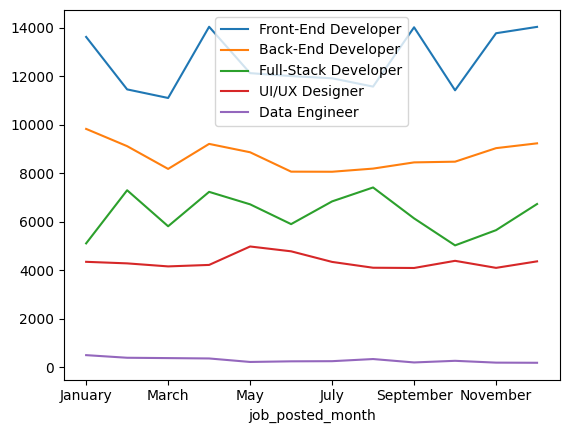

In [7]:
df_merged[top_5].plot(kind='line')

In [8]:
df['month']=df['job_posted_date'].dt.month_name()

In [9]:
months = df['month'].unique()
months

array(['June', 'January', 'October', 'July', 'August', 'November',
       'March', 'December', 'April', 'February', 'September', 'May'],
      dtype=object)

In [10]:
dict_months = {month: df[df['month'] == month ] for month in months}
dict_months['January']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",January
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",January
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",January
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",January
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",January
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",January
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,January


In [11]:
df_q1=pd.concat([dict_months['January'], dict_months['February'],dict_months["March"]],ignore_index=True)

<Axes: xlabel='month'>

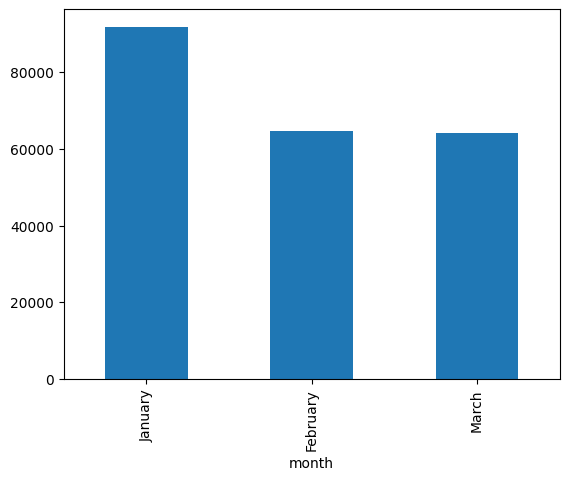

In [12]:
df_q1['month'].value_counts().plot(kind="bar")

In [13]:
df_q1.head().to_clipboard(sep=",")

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,,,,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']","{'analyst_tools': ['power bi', 'tableau'], 'programming': ['r', 'python', 'sql', 'nosql']}",January
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,,,,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark']","{'libraries': ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark'], 'programming': ['r', 'python', 'sql']}",January
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,,,,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",January
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,,,,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws'], 'programming': ['sql', 'python']}",January
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,,,,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python', 'sql']}",January


In [14]:
df_q1.to_csv('q1.csv')

In [15]:
pd.read_csv('q1.csv', index_col=0)
#jesli kolumna indexowa nie jest nazwana, csv automatycznie
#nazwya ja 0, wiec zeby tego uniknac w kodzie -> index_col=0

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",January
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,NaN,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",January
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,NaN,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",January
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,NaN,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",January
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,NaN,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",March
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",March
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",March
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",March


In [17]:
df_q1.head().to_excel('q1.xlsx')

In [ ]:
#inne wazne eksporty
# to_sql()

#dla duzych data setow, dla zaawansowanych 
# to_parquet()
#to_pickel()